# Predicción del desempeño académico de alumnos de preparatoria en clase de Portugués.

Fecha: 14 de marzo de 2025

Integrantes del equipo:
* Fernando Mendoza Velasco
* Mónica Lizette Cardona Solís
* Marianna Montserrat Curiel Zambrano

## Descripción del conjunto de datos

El conjunto de datos fue recopilado por Paulo Cortez y Alice Silva en 2008 para su estudio _"Using data mining to predict secondary school student performance"_. Los datos fueron obtenidos de estudiantes de nivel preparatoria en dos escuelas de Portugal y los datos académicos pertenecen a una clase de lengua portuguesa. En su análisis, Cortez y Silva intentaron predecir la calificación final del estudiante usando un predictor ingenuo (NV), una red neuronal (NN), una máquina de vectores de soporte (SVM), un árbol de decisiones (DT) y un bosque aleatorio (RF). Finalmente, compararon el rendimiento de los modelos en distitnas selecciones de los datos.

El conjunto de datos incluye:

* Características sociodemográficas
* Hábitos
* Desempeño académico (faltas y calificaciones)

El conjunto de datos tiene 33 columnas y 649 filas. La siguiente tabla describe cada una de las columnas:

| Variable   | Descripción                              | Rango (valores posibles)                                |
|------------|------------------------------------------|---------------------------------------------------------|
| sex        | Sexo del estudiante                      | "F" o "M"                                               |
| age        | Edad en años                             | 15 - 22                                                 |
| school     | Escuela a la que asiste                  | Gabriel Pereira o Mousinho de Silveira                  |
| address    | Entorno donde vive                       | "U" urbano, "R" rural                                   |
| Pstatus    | Estado de los padres                     | "T" viven juntos, "A" viven separados                   |
| Medu       | Educación de la madre                    | 0 (sin educación) - 4 (educación superior)              |
| Mjob       | Trabajo de la madre                      | Area profesional                                        |
| Fedu       | Educación del padre                      | 0 (sin educación) - 4 (educación superior)              |
| Fjob       | Trabajo del padre                        | Area profesional                                        |
| guardian   | Quién es el tutor                        | Madre, padre u otro                                     |
| famsize    | Tamaño de la familia                     | "GT3" mas de 3 integrantes, "LE3" 3 o menos integrantes |
| famrel     | Calidad de relaciones familiares         | 1 (muy malas) - 5 (excelentes)                          |
| reason     | Motivo para elegir la escuela            | Opciones (cerca de casa, nivel academico, otro)         |
| traveltime | Tiempo para llegar a la escuela          | 1 (menos de 15 minutos) - 4 (mas de una hora)           |
| studytime  | Tiempo de estudio a la semana            | 1 (menos de 2 horas) - 4 (mas de 10 horas)              |
| failures   | Número de clases reprobadas antes        | Entre 1 y 3, en otro caso 4                             |
| schoolsup  | Apoyo educativo adicional                | Si o no                                                 |
| famsup     | Apoyo familiar adicional                 | Si o no                                                 |
| activities | Hace actividades extracurriculares       | Si o no                                                 |
| paidclass  | Paga clases extra                        | Si o no                                                 |
| internet   | Tiene internet en su hogar               | Si o no                                                 |
| nursery    | Asistió a maternal                       | Si o no                                                 |
| higher     | Quiere estudiar educación superior       | Si o no                                                 |
| romantic   | En relación romántica                    | Si o no                                                 |
| freetime   | Tiempo libre después de escuela          | 1 (muy poco) - 5 (mucho)                                |
| goout      | Tiempo que pasa salinendo con amigos     | 1 (muy poco) - 5 (mucho)                                |
| Walc       | Consumo de alcohol en fin de semana      | 1 (muy poco) - 5 (mucho)                                |
| Dalc       | Consumo de alcohol entre semana          | 1 (muy poco) - 5 (mucho)                                |
| health     | Estado de salud                          | 1 (muy malo) - 5 (muy bueno)                            |
| absences   | Número de faltas escolares               | 0 a 93                                                  |
| G1         | Calificación parcial del primer periodo  | 0 a 20                                                  |
| G2         | Calificación parcial del segundo periodo | 0 a 20                                                  |
| G3         | Calificación final                       | 0 a 20                                                  |

El atributo a predecir es la calificación final _G3_. Como mencionan los autores del conjunto de datos, naturalmente la calificación final tiene una dependencia considerable en las calificaciones parciales _G1_ y _G2_. Los autores usaron tres "configuraciones de entradas" en su trabajo, para contrastar el impacto de esta correlación aparente:

* **A**, considerando todas las variables excepto _G3_.
* **B**, similar a **A**, pero además no considera _G2_.
* **C**, similar a **B**, pero no considera ninguna de las calificaciones.

Para el presente análisis y modelado, se usa la configuración de entradas **B**. La calificación del primer periodo _G1_ da mayor certeza en las predicciones, pero tampoco determina por completo el valor objetivo de _G3_.

Como recordatorio importante, las calificaciones incluidas en el dataset van de 0 a 20.

## Objetivos

Predecir la calificación final en la clase de portugués de los estudiantes de preparatoria, usando modelos que consideren las variables sociodemográficas, académicas y personales relevantes.

Los objetivos específicos son:

1. Usar estadísticas descriptivas, visualizaciones básicas y acondicionamiento de datos para comprender el conjunto de datos.
2. Identificar las principales variables que influyen en la calificación final de un alumno.
3. Ajustar dos modelos de regresión para predecir la calificación final:

    a. Un modelo de clasificación binaria, que predice si un estudiante va a aprobar o reprobar la materia.
    
    b. Un modelo que predice el valor numérico de la calificación final.

4. Usar medidas de error para evaluar el ajsute de los modelos.



## Análisis exploratorio de datos

Consiste en tres tareas:

1. Interpretar y cargar el conjunto de datos en el entorno.
2. Revisar si hay valores faltantes o incorrectos.
3. Obtener estadísticas descriptivas básicas e identificar valores atípicos.

In [37]:
import pandas as pd
import numpy as np

PATH_DATASET = "./dataset/student-por.csv"

# Cargar los datos del CSV en un dataframe de Pandas.
df = pd.read_csv(PATH_DATASET)

# Mostrar las primeras 5 filas del dataset.
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Una vez que el conjunto de datos está cargado en la variable `df`, el método `info()` muestra información básica, incluyendo el número total de entradas y el número de ellas que tienen valores no-nulos.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

El dataset es de calidad, porque ninguna de las columnas contiene valores nulos. Esto significa que no es necesario hacer tanto trabajo de limpieza y preparación de datos.

A su vez, el método `describe()` calcula las siguientes estadísticas descriptivas para cada una de las columnas numéricas:

* Promedio (mean): es una medida de tendencia central que da idea de la ubicación del centro de los datos.
* Desviación estándar (std): es una medida de dispersión.
* Mínimo (min) y máximo (max): determinan el intervalo de valores encontrados en la columna. Debería coincidir con los rangos citados en la descripción de variables.
* Cuartiles (25%, 50% y 75%): describen la distribución de los datos, pueden visualizarse usando gráficas de cajas y bigotes, por ejemplo.

Obtener estas medidas estadísticas da una primera noción de las distribuciones de cada columna, permite identificar si los valores numéricos de alguna son anormales o incorrectos, y confirma los intervalos de valores.

In [39]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


La gran mayoría de las columnas tienen valores numéricos, pero algunas tienen valores categóricos:

* _sex_ tiene valores "F" o "M".
* _address_ tiene valores "U" o "P".
* _famsize_ tiene valores "GT3" o "LE3".
* _Pstatus_ tiene valores "T" o "A".

Las columnas anteriores pueden representarse de forma binaria.




In [40]:
df_valores_numericos = df.copy()
df_valores_numericos["sex"] = df_valores_numericos["sex"].map({"F": 1, "M": 0})
df_valores_numericos["address"] = df_valores_numericos["address"].map({"U": 1, "R": 0})
df_valores_numericos["famsize"] = df_valores_numericos["famsize"].map({"GT3": 1, "LE3": 0})
df_valores_numericos["Pstatus"] = df_valores_numericos["Pstatus"].map({"T": 1, "A": 0})
df_valores_numericos.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,1,18,1,1,0,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,1,17,1,1,1,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,1,15,1,0,1,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,1,15,1,1,1,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,1,16,1,1,1,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Para las visualizaciones básicas, se usan histogramas con un máximo de 20 bins de las columnas que se piensa podrían tener mayor impacto sobre la calificación final del estudiante. Por ejemplo, tendría sentido que la calificación final disminuyera cuando las faltas, las fallas académicas y el consumo de alcohol aumentan.

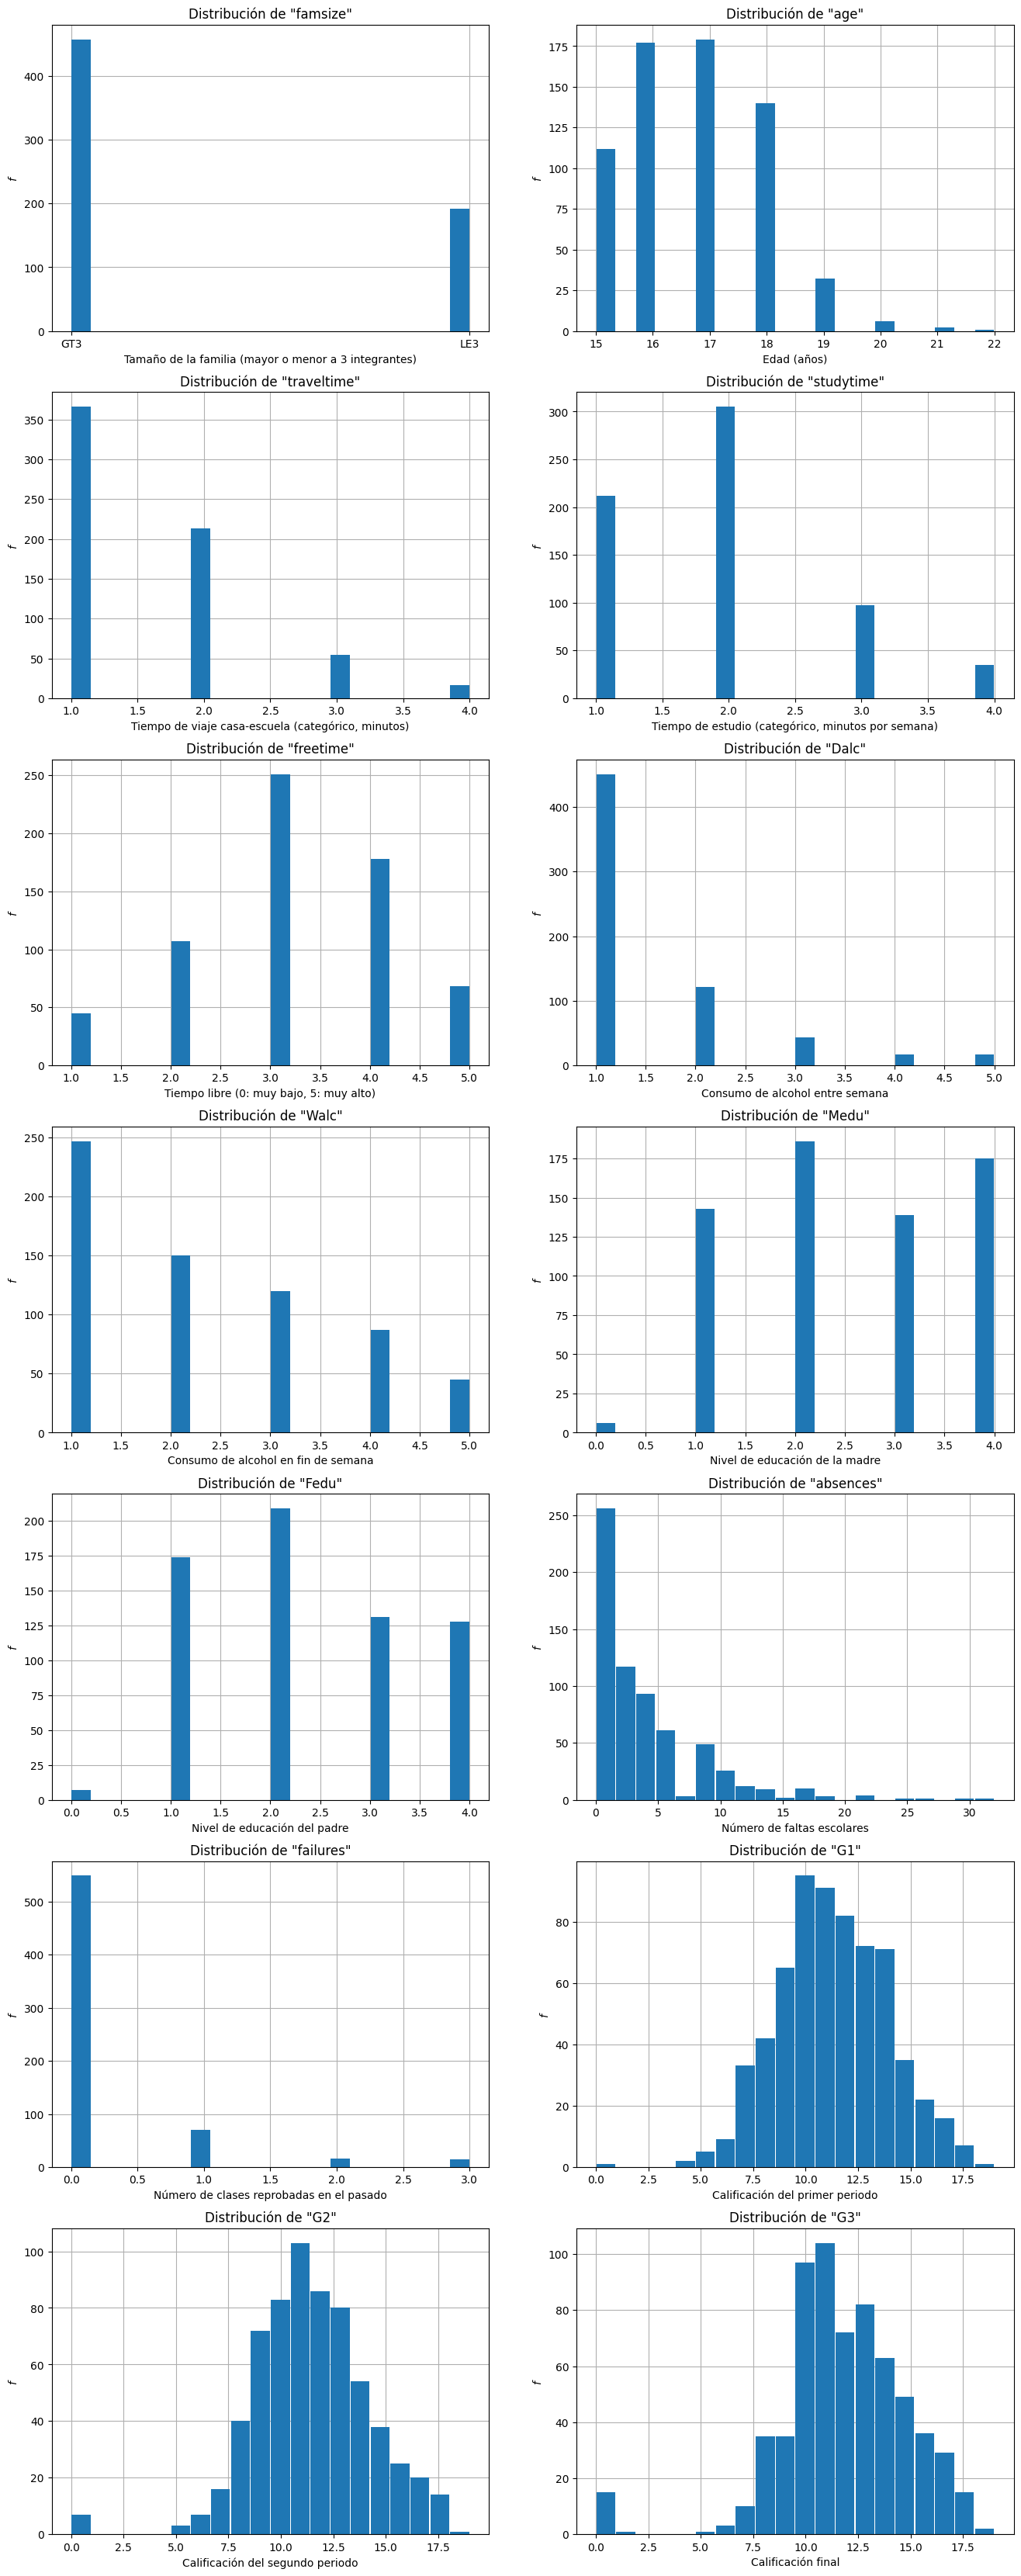

In [41]:
from math import ceil
import matplotlib.pyplot as plt

# Listar todas las columnas que se van a visualizar.
columnas_visualizadas = ["famsize", "age", "traveltime", "studytime", "freetime", "Dalc", "Walc", "Medu", "Fedu", "absences", "failures", "G1", "G2", "G3"]
labels = [
    "Tamaño de la familia (mayor o menor a 3 integrantes)", 
    "Edad (años)", 
    "Tiempo de viaje casa-escuela (categórico, minutos)", 
    "Tiempo de estudio (categórico, minutos por semana)",
    "Tiempo libre (0: muy bajo, 5: muy alto)",
    "Consumo de alcohol entre semana",
    "Consumo de alcohol en fin de semana",
    "Nivel de educación de la madre",
    "Nivel de educación del padre",
    "Número de faltas escolares",
    "Número de clases reprobadas en el pasado",
    "Calificación del primer periodo",
    "Calificación del segundo periodo",
    "Calificación final"
]

NUM_COLUMNS_IN_FIGURE = 2
NUM_ROWS_IN_FIGURE = ceil(len(columnas_visualizadas) / NUM_COLUMNS_IN_FIGURE)

# Generar una cuadrícula de histogramas.
fig, axes = plt.subplots(NUM_ROWS_IN_FIGURE, NUM_COLUMNS_IN_FIGURE)
fig.set_size_inches(16, NUM_ROWS_IN_FIGURE * 6)

i =  0
for row in axes:
    for ax in row:
        if i < len(columnas_visualizadas):
            ax.hist(df[columnas_visualizadas[i]], bins=20, rwidth=0.95, zorder=2)
            ax.set_title(f"Distribución de \"{columnas_visualizadas[i]}\"")
            ax.set_xlabel(labels[i])
            ax.set_ylabel(r"$f$")
            ax.grid(True)
        else:
            fig.delaxes(ax)

        i += 1

# Guardar la figura resultante en la dirección dada, con calidad de 300 dpi.
plt.savefig("graficas/student/histogramas_2.png", dpi=300)

plt.show()

## Correlación

El conjunto de datos original incluye 33 columnas, pero solo un subconjunto de atributos será suficientemente significativo como para predecir la calificación final. 

Para cuantificar la influencia de las variables en la variable objetivo, se calculan los coeficientes de correlación. Esta sección los presenta en mapas de calor.

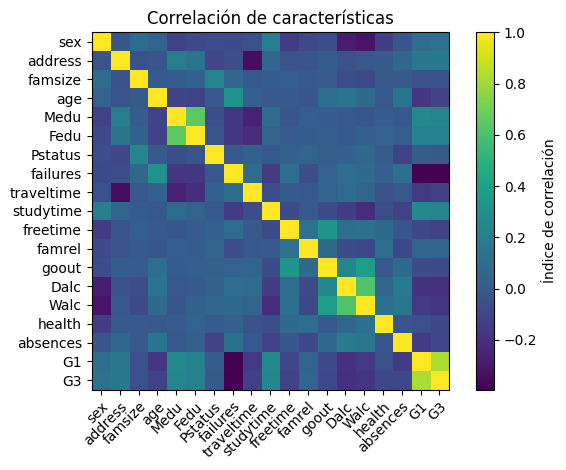

In [42]:
col_correlacion = ["sex", "address", "famsize", "age", "Medu", "Fedu", "Pstatus", "failures", "traveltime", "studytime", "freetime", "famrel", "goout", "Dalc", "Walc", "health", "absences", "G1", "G3"]

# Calcular la matriz de índices de correlación entre las columnas seleccionadas.
matriz_correlacion = df_valores_numericos[col_correlacion].corr()

# Dibujar un mapa de calor.
fig, ax = plt.subplots()
im = ax.imshow(matriz_correlacion)

# Agregar anotaciones en los ejes.
ax.set_xticks(range(len(col_correlacion)), labels=col_correlacion, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(col_correlacion)), labels=col_correlacion)

ax.set_title("Correlación de características")

fig.colorbar(im, ax=ax, label='Índice de correlación')
fig.tight_layout()

plt.savefig("graficas/student/mapa_correlacion_2.png", dpi=300)
plt.show()

El mapa de calor anterior incluye un subconjunto numeroso de atributos, pero muchos de ellos tienen índices de correlación bajos con respecto a la calificación final. Las columnas _G1_ y _failures_ son excepciones a este comportamiento al presentar una correlación alta.

Para aislar las columnas con mayor correlación con la calificación final, se seleccionan aquellas que tienen un índice de correlación con _G3_ con una magnitud mayor a 0.15.

In [43]:
matriz_correlacion["G3"].sort_values()

failures     -0.393316
Dalc         -0.204719
Walc         -0.176619
traveltime   -0.127173
freetime     -0.122705
age          -0.106505
health       -0.098851
absences     -0.091379
goout        -0.087641
famsize      -0.045016
Pstatus      -0.000754
famrel        0.063361
sex           0.129077
address       0.167637
Fedu          0.211800
Medu          0.240151
studytime     0.249789
G1            0.826387
G3            1.000000
Name: G3, dtype: float64

In [44]:
indice_correlacion_min = 0.15
sorted_corr = matriz_correlacion["G3"].sort_values()
principales_correlaciones = [sorted_corr.index[i] for i in range(len(sorted_corr)) if abs(sorted_corr.values[i]) >= indice_correlacion_min]
principales_correlaciones

['failures',
 'Dalc',
 'Walc',
 'address',
 'Fedu',
 'Medu',
 'studytime',
 'G1',
 'G3']

Con la selección de 8 atributos principales, se dibuja un segundo mapa de calor que describe a mayor detalle las correlaciones entre los atributos y la calificación final.

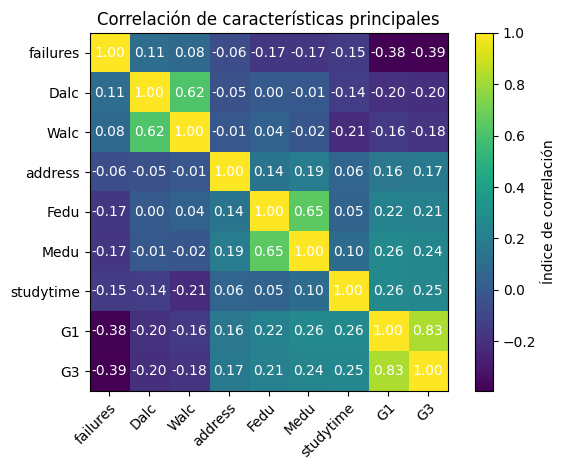

In [45]:
matriz_correlacion = df_valores_numericos[principales_correlaciones].corr()

fig, ax = plt.subplots()
im = ax.imshow(matriz_correlacion)

# Agregar anotaciones en los ejes y en cada recuadro del mapa.
ax.set_xticks(range(len(principales_correlaciones)), labels=principales_correlaciones, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(principales_correlaciones)), labels=principales_correlaciones)

for i in range(len(principales_correlaciones)):
    for j in range(len(principales_correlaciones)):
        text = ax.text(j, i, f"{matriz_correlacion.iloc[i].iloc[j]:.2f}", ha="center", va="center", color="w")

ax.set_title("Correlación de características principales")

fig.colorbar(im, ax=ax, label='Índice de correlación')
fig.tight_layout()

plt.savefig("graficas/student/mapa_correlacion_2_principal.png", dpi=300)
plt.show()

Finalmente, se realizan gráficas de dispersión para visualizar mejor la forma de la dependencia de la calificación final y los 8 atributos seleccionados. El área de cada punto es proporcional a la frecuencia absoluta del par de valores.

La dispersión puede parecer tener poca densidad en el caso de las variables categóricas, pero también muestra claramente la relación lineal entre _G1_ y la calificación final. 

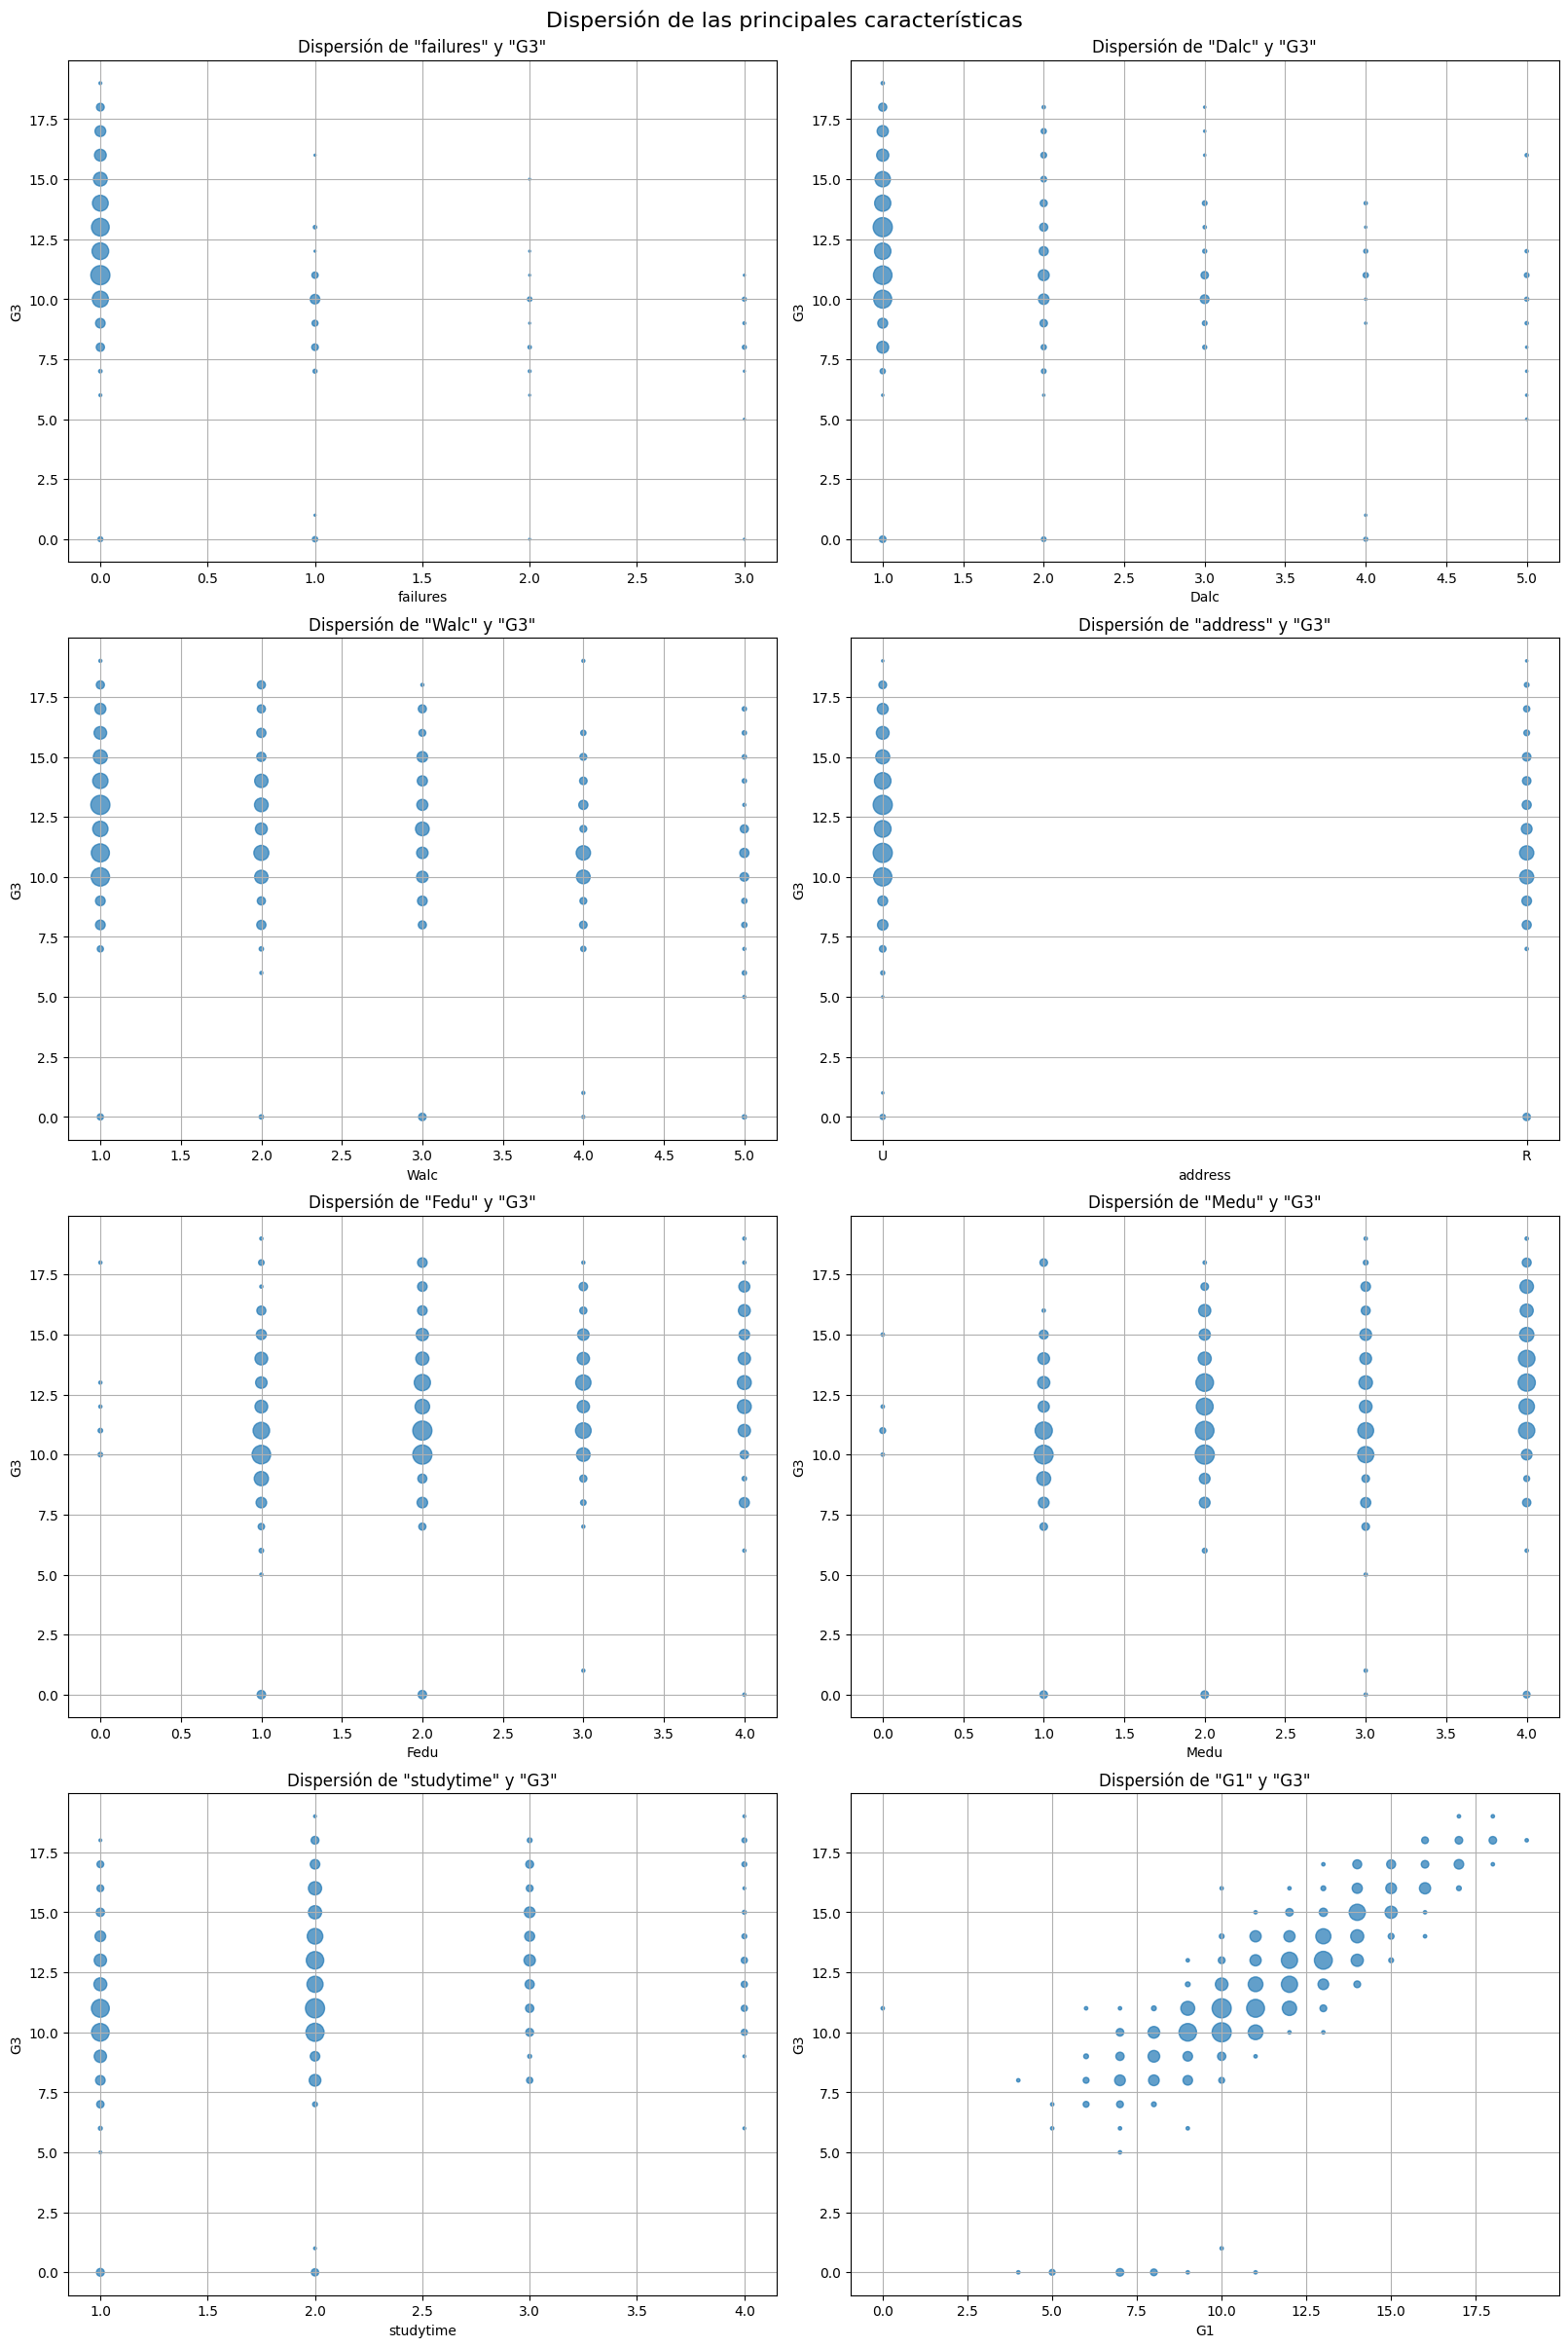

In [46]:
caracteristica_predicha = "G3"
n_plots = len(principales_correlaciones) - 1
ncols = 2
nrows = ceil(n_plots / ncols)

fig, axs = plt.subplots(nrows, ncols, layout="constrained")
fig.suptitle("Dispersión de las principales características", fontsize=16)
fig.set_size_inches(16, 6 * nrows)

i =  0
for row in axs:
    for ax in row:
        if i < n_plots:
            counts = {}
            for j in range(len(df[caracteristica_predicha])):
                key = (df[principales_correlaciones[i]][j], df[caracteristica_predicha][j])

                if key not in counts:
                    counts[key] = 0

                counts[key] += 1

            caracteristica = [key[0] for key in counts.keys()]
            prediccion = [key[1] for key in counts.keys()]

            highest_count = max(counts.values())
            marker_sizes = [200 * (float(count) / highest_count) for count in counts.values()]

            ax.scatter(caracteristica, prediccion, s=marker_sizes, alpha=0.7)
            ax.set_title(f"Dispersión de \"{principales_correlaciones[i]}\" y \"{caracteristica_predicha}\"")
            ax.set_xlabel(principales_correlaciones[i])
            ax.set_ylabel(caracteristica_predicha)

            ax.grid(True)
        else:
            fig.delaxes(ax)

        i += 1

plt.savefig("graficas/student/scatter_principales_correlaciones.png", dpi=300)
plt.show()

## Planteamiento e implementación de modelos

Esta sección implementa dos modelos de regresión con los 8 atributos principales:

1. Clasificación binaria para indicar si un estudiante aprobó o reprobó en su calificación final. Usa regresión logística para clasificar.
2. Predicción del valor numérico de la calificación final (0-20). Usa regresión lineal.

El primer paso es definir una columna adicional _G3_passing_, que tiene valor 1 si el valor de la columna _G3_ es mayor o igual a la calificación aprobatoria, o 0 en caso contrario.

La calificación aprobatoria se fija en 10, en la escala 0-20.

In [47]:
calificacion_aprobatoria = 10

df_valores_numericos["G3_passing"] = df_valores_numericos["G3"].transform(lambda g3: 1 if g3 >= calificacion_aprobatoria else 0)
df_valores_numericos[["G3", "G3_passing"]].head(20)

,G3,G3_passing
0,11,1
1,11,1
2,12,1
3,14,1
4,13,1
5,13,1
6,13,1
7,13,1
8,17,1
9,13,1


Para identificar la distribución de la nueva columna derivada _G3_, se presenta un diagrama de barras con la proporción de estudiantes que aprobaron y reprobaron la clase de portugués.

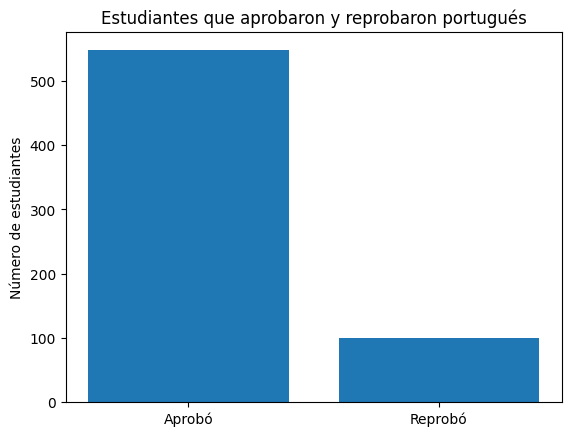

In [48]:
total_g3_aprobatoria = df_valores_numericos["G3_passing"].map({0: "Reprobó", 1: "Aprobó"}).value_counts()

fig, ax = plt.subplots()
ax.bar(total_g3_aprobatoria.index, total_g3_aprobatoria.values)
ax.set_ylabel("Número de estudiantes")
ax.set_title("Estudiantes que aprobaron y reprobaron portugués")

plt.savefig("graficas/student/g3_aprobatoria.png", dpi=300)
plt.show()

### Clasificación binaria

El modelo de clasificación binaria recibe como entradas los 8 atributos principales, y sus predicciones serán una serie de dígitos binarios, que indican si un estudiante dado aprobó la materia. La clasificación binaria se logra usando regresión logística.

Fundamentalmente, la regresión logística es un problema de minimización de la función de costo. Por lo tanto, se incluye la función `minimize()` del paquete `scipy.optimize`. La implementación de la regresión logística se hace "manualmente", a pesar de que hay paquetes con implementaciones útiles.

In [49]:
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

La preparación de los datos para la regresión logística incluye dos pasos:

1. El conjunto de datos se separa en dos subconjuntos usando `train_test_split()`, uno para entrenamiento y otro para prueba. La proporción de los datos es 75 % entrenamiento, y 25 % de prueba.
2. `StandardScaler.fit_transform()` estandariza los datos. Esto resulta en que todos los atributos considerados tengan un rango uniforme, su media esté centrada en 0 y tengan desviación estándar 1.

La separación del conjunto de datos tiene como objetivo asegurar que la prueba del modelo sea significativa, al hacer que el modelo prediga la variable objetivo a partir de combinaciones de atributos principales que no fueron usadas para el entrenamiento y ajuste. Por otro lado, la estandarización puede mejorar la exactitud de la clasificación.

In [50]:
test_size = 0.25
random_state = 80
scaler = StandardScaler()

col_caracteristicas = principales_correlaciones[:-1]

g3_entrenamiento, g3_prueba = train_test_split(df_valores_numericos["G3"].values, test_size=test_size, random_state=random_state)
g3_passing_entrenamiento, g3_passing_prueba = train_test_split(df_valores_numericos["G3_passing"].values, test_size=test_size, random_state=random_state)

X = df_valores_numericos[col_caracteristicas].values
X_entrenamiento, X_prueba = train_test_split(X, test_size=test_size, random_state=random_state)

X_entrenamiento_std = scaler.fit_transform(X_entrenamiento, g3_passing_entrenamiento)
X_prueba_std = scaler.fit_transform(X_prueba, g3_passing_prueba)

f"{len(g3_passing_entrenamiento)} datos de entrenamiento, {len(g3_passing_prueba)} datos de prueba"

'486 datos de entrenamiento, 163 datos de prueba'

La clase `RegresionLogistica` implementa métodos para realizar el ajuste del modelo y hacer predicciones:

* `ajustar()` recibe el conjunto de atributos de entrenamiento, así como los resultados reales para cada alumno. Invoca `minimize()` para encontrar los coeficientes `theta` que minimizan el valor de la función de costo, usando el método "BFGS".

* `predecir()` recibe un conjunto de atributos de prueba y genera predicciones indicando si cada alumno aprueba o reprueba la clase. Invoca a `sigmoide()` para calcular las probabilidades asociadas a las predicciones, y finalmente mapea las probabilidades a predicciones binarias.

* `calcular_puntaje_exactitud()` calcula el _accuracy score_ de la regresión logística, definida como la proporción de predicciones verdaderas a las predicciones totales. Mientras más cercano a 1, mejor es el ajuste del modelo.

* `costo()` evalúa la función de costo (log-loss) para un conjunto de atributos de entrada `X`, parámetros `theta` y predicciones esperadas `y`. Matemáticamente, evalúa la siguiente expresión:

    $$ J(\theta) = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log \sigma(\theta^T X_i) + (1 - y_i) \log (1 - \sigma(\theta^T X_i)) \right] $$

    Sumada a la regularización L2, con el fin de evitar el sobreajuste del modelo:

    $$ R(\theta) = \frac{\lambda}{2n} \sum_{j=1}^{m} \theta_j^2 $$

In [51]:
class RegresionLogistica:

    def ajustar(self, X, y):
        self.m = len(y)

        X_entrenamiento_std_adaptada = np.c_[np.ones((X.shape[0], 1)), X]
        theta_inicial = np.zeros(X_entrenamiento_std_adaptada.shape[1])

        self.theta = minimize(self.costo, theta_inicial, args=(X_entrenamiento_std_adaptada, y), method="BFGS").x


    def predecir(self, caracteristicas):
        caracteristicas_bias_scaled = np.c_[np.ones((caracteristicas.shape[0], 1)), caracteristicas]
        predicciones_prob = self.sigmoide(caracteristicas_bias_scaled @ self.theta)
        self.y_pred = [1 if y_pred >= 0.5 else 0 for y_pred in predicciones_prob]
        return self.y_pred


    def calcular_puntaje_exactitud(self, y_true):
        return accuracy_score(y_true, self.y_pred)


    def sigmoide(self, z):
        return 1 / (1 + np.exp(-z))
    

    def l2(self, theta, valor_lambda):
        return valor_lambda * np.sum(theta[1:self.m]**2) / (2 * self.m)
    
    
    def costo(self, theta, X, y, valor_lambda=0.1):
        h = self.sigmoide(X @ np.transpose(theta))
        epsilon = 1e-5
        valor_costo = - (np.dot(y, np.log(h + epsilon)) + np.dot((1 - y), np.log(1 - h + epsilon))) / self.m
        return valor_costo + self.l2(theta, valor_lambda)

Para entrenar y usar el modelo de clasificación binaria, se siguen los siguientes pasos:

1. Crear una nueva instancia de `RegresionLogistica`.

2. Invocar el método `ajustar()` para entrenar el modelo, con los subconjuntos de datos de entrenamiento.

3. Invocar el método `predecir()` para realizar predicciones sobre el subconjunto de prueba, usando el modelo.

4. Invocar el método `calcular_puntaje_exactitud` para determinar el _accuracy score_ del modelo y evaluar su rendimiento.

In [ ]:
clasificador_binario = RegresionLogistica()

clasificador_binario.ajustar(X_entrenamiento_std, g3_passing_entrenamiento)

display(f"Coeficientes theta = {clasificador_binario.theta}")

predicciones_g3_aprobatoria = clasificador_binario.predecir(X_prueba_std)

display(f"Primeras 10 predicciones de si cada estudiante aprueba o reprueba en la calificación final: {predicciones_g3_aprobatoria[:10]}")

display(f"Accuracy score = {clasificador_binario.calcular_puntaje_exactitud(g3_passing_prueba)}")

'Coeficientes theta = [ 3.62385629 -0.2209503   0.09014452 -0.24410268  0.06576484  0.08203695\n  0.02013778 -0.03321234  2.84286498]'

'Predicciones para aprobar G3: [0, 1, 0, 1, 1, 1, 1, 1, 1, 1]'

'Accuracy score = 0.9325153374233128'

In [53]:
for i in range(len(clasificador_binario.theta)):
    display(Markdown(r"$ \theta_{i} = {theta}$".format(i=i, theta=f"{clasificador_binario.theta[i]:.6f}")))

$ \theta_0 = 3.623856$

$ \theta_1 = -0.220950$

$ \theta_2 = 0.090145$

$ \theta_3 = -0.244103$

$ \theta_4 = 0.065765$

$ \theta_5 = 0.082037$

$ \theta_6 = 0.020138$

$ \theta_7 = -0.033212$

$ \theta_8 = 2.842865$

In [54]:
positivos_verdaderos = np.sum([1 if predicciones_g3_aprobatoria[i] == 1 and g3_passing_prueba[i] == 1 else 0 for i in range(len(g3_passing_prueba))])
negativos_verdaderos = np.sum([1 if predicciones_g3_aprobatoria[i] == 0 and g3_passing_prueba[i] == 0 else 0 for i in range(len(g3_passing_prueba))])
falsos_positivos = np.sum([1 if predicciones_g3_aprobatoria[i] == 1 and g3_passing_prueba[i] == 0 else 0 for i in range(len(g3_passing_prueba))])
falsos_negativos = np.sum([1 if predicciones_g3_aprobatoria[i] == 0 and g3_passing_prueba[i] == 1 else 0 for i in range(len(g3_passing_prueba))])

display(f"Verdaderos positivos: {positivos_verdaderos}")
display(f"Verdaderos negativos: {negativos_verdaderos}")
display(f"Falsos positivos: {falsos_positivos}")
display(f"Falsos negativos: {falsos_negativos}")

'Verdaderos positivos: 135'

'Verdaderos negativos: 17'

'Falsos positivos: 10'

'Falsos negativos: 1'

Como puede observarse en los resultados anteriores, el modelo de clasificación binaria tiene buena exactitud. Su _accuracy score_ es cercano a 0.93, lo cual significa que la mayoría de sus predicciones son acertadas. Esta conclusión es reforzada al contar el número de predicciones positivas verdaderas (_TP_), negativas verdaderas (_TF_), positivas falsas (_FP_) y negativas falsas (_FN_).

Según estos resultados, el modelo de clasificación binaria es capaz de predecir si un alumno de la clase va a aprobar o reprobar, conociendo su calificación parcial en el primer periodo y otros 7 atributos que resultaron ser buenos indicadores de la calificación final.

### Predicción de calificación final

La clase `RegresionLineal` implementa métodos similares a los de la clase `RegresionLogistica` para realizar el ajuste del modelo y hacer predicciones:

* `ajustar()` recibe el conjunto de atributos de entrenamiento, así como los resultados reales para cada alumno. Invoca `minimize()` para encontrar los coeficientes `beta` que minimizan el valor de la función de costo, usando el método "BFGS".

* `predecir()` recibe un conjunto de atributos de prueba y genera predicciones de la calificación final numérica de cada alumno. La calificación final está dada por una multiplicación matricial entre los coeficientes `beta` y los parámetros de entrada `X`.

* `calcular_puntaje_exactitud()` calcula el valor _RMSE_ (raíz del error promedio cuadrado) de la regresión lineal.

* `costo()` evalúa la función de costo (mínimos cuadrados) para un conjunto de atributos de entrada `X`, parámetros `beta` y predicciones esperadas `y`. Matemáticamente, evalúa la siguiente expresión:

    $$ J(\mathbf{\beta}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 X_i))^2 $$

In [55]:
from sklearn.metrics import root_mean_squared_error

class RegresionLineal:

    def ajustar(self, X, y):
        X_entrenamiento_std_adaptada = np.c_[np.ones((X.shape[0], 1)), X]
        beta_inicial = np.zeros(X_entrenamiento_std_adaptada.shape[1])

        self.beta = minimize(self.costo, beta_inicial, args=(X_entrenamiento_std_adaptada, y), method="BFGS").x


    def predecir(self, caracteristicas):
        caracteristicas_adaptada = np.c_[np.ones((caracteristicas.shape[0], 1)), caracteristicas]
        self.y_pred = caracteristicas_adaptada @ self.beta
        return self.y_pred


    def calcular_puntaje_exactitud(self, y_true):
        return root_mean_squared_error(y_true, self.y_pred)
    
    
    def costo(self, beta, X, y):
        n = X.shape[0]
        return np.sum([(y[i] - X[i].dot(beta))**2 for i in range(n)]) / n

Para entrenar y usar el modelo de predicción de calificación final numérica, se siguen los siguientes pasos:

1. Crear una nueva instancia de `RegresionLineal`.

2. Invocar el método `ajustar()` para entrenar el modelo, con los subconjuntos de datos de entrenamiento.

3. Invocar el método `predecir()` para realizar predicciones sobre el subconjunto de prueba, usando el modelo.

4. Invocar el método `calcular_puntaje_exactitud` para determinar el _RMSE_ del modelo y evaluar su rendimiento.

In [ ]:
estimador_lineal = RegresionLineal()

estimador_lineal.ajustar(X_entrenamiento, g3_entrenamiento)

display(estimador_lineal.beta)

predicciones_g3 = estimador_lineal.predecir(X_prueba)

display(f"Primeras 10 predicciones de la calificacicón final numérica: {predicciones_g3[:10]}")

display(f"RMSE = {estimador_lineal.calcular_puntaje_exactitud(g3_prueba)}")

array([ 2.03640977, -0.50926364, -0.08638   , -0.05981968,  0.20086837,
        0.07429599,  0.00991215,  0.10419701,  0.85745232])

'Predicciones para aprobar G3: [ 7.98078024  9.97401456  7.70543156 11.84004462 11.90426388 14.43461818\n  9.22769226 11.40051281 11.71823339 17.81765786]'

'RMSE = 1.8046039785558898'

In [57]:
from IPython.display import Markdown

ecuacion_modelo = r"Y = \beta_0"

for i in range(len(estimador_lineal.beta)):
    ecuacion_modelo += r"+ \beta_{i} X_{i}".format(i=i+1)

display(Markdown(r"$" + ecuacion_modelo + r"$"))

$Y = \beta_0+ \beta_1 X_1+ \beta_2 X_2+ \beta_3 X_3+ \beta_4 X_4+ \beta_5 X_5+ \beta_6 X_6+ \beta_7 X_7+ \beta_8 X_8+ \beta_9 X_9$

In [58]:
for i in range(len(estimador_lineal.beta)):
    display(Markdown(r"$ \beta_{i} = {beta}$".format(i=i, beta=f"{estimador_lineal.beta[i]:.6f}")))

$ \beta_0 = 2.036410$

$ \beta_1 = -0.509264$

$ \beta_2 = -0.086380$

$ \beta_3 = -0.059820$

$ \beta_4 = 0.200868$

$ \beta_5 = 0.074296$

$ \beta_6 = 0.009912$

$ \beta_7 = 0.104197$

$ \beta_8 = 0.857452$

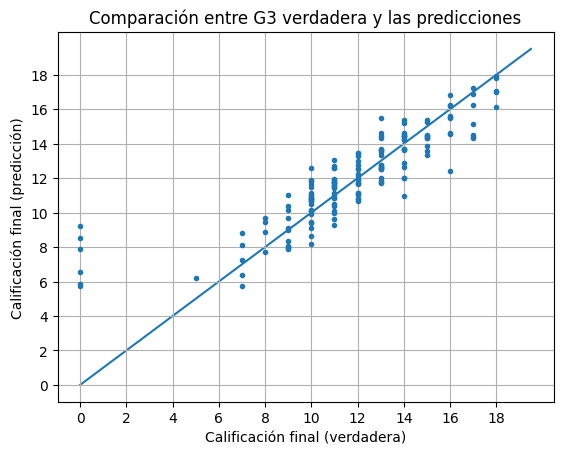

In [59]:
rango_g3_verdadera = np.arange(0, 20, 0.5)
valor_g3_prediccion_ideal = rango_g3_verdadera

fig, ax = plt.subplots()
ax.scatter(g3_prueba, predicciones_g3, marker=".", zorder=2)
ax.plot(rango_g3_verdadera, valor_g3_prediccion_ideal, zorder=1)

ax.set_title("Comparación entre G3 verdadera y las predicciones")
ax.set_xlabel("Calificación final (verdadera)")
ax.set_xticks(range(0, 20, 2))
ax.set_ylabel("Calificación final (predicción)")
ax.set_yticks(range(0, 20, 2))
ax.grid(True)

plt.savefig("graficas/student/dispersión_modelo_lineal.png", dpi=300)
plt.show()

A partir de la gráfica anterior, puede notarse que la relación entre la calificación final _G3_ verdadera y las predicciones realizadas por el modelo es casi lineal, con una pendiente cercana a 1. Además, el valor de _RMSE_ del modelo de regresión lineal es relativamente bajo (cercano a 1.8). Sin embargo, hay puntos donde la calificación final verdadera es 0 que no fueron predichos correctamente. Fuera de las predicciones atípicas, el modelo proporciona un buen ajuste a los datos de calificación final, y permite predecir con exactitud razonable la calificación final de un alumno en la clase, a partir de su calificación parcial _G1_ y otros siete atributos principales.

## Conclusiones

Se analizó un conjunto de datos con el rendimiento académico de alrededor de 600 estudiantes de nivel preparatoria en la clase de portugués, en dos escuelas de Portugal. A partir de la exploración inicial de los datos, se identificaron ocho atributos correlacionados con la calificación final:

1. El númeo de materias reprobadas anteriormente.
2. El consumo de alcohol entre semana.
3. El consumo de alcohol en fin de semana.
4. La residencia del estudiante (urbana o rural).
5. El nivel de educación de la madre.
6. El nivel de educación del padre.
7. El tiempo de estudio.
8. La calificación en el primer periodo.

Se entrenaron dos modelos que permiten predecir categórica y numéricamente la calificación final de un estudiante, con exactitud considerable. Estas predicciones pueden servir para apoyar a los estudiantes, o para identificar condiciones del entorno que impactan en el desempeño académico del estudiante.